In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.applications import vgg16
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
batch_size = 32
img_height = 224
img_width = 224

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'C:/DS/Netology/Diploma/data/train',
  #validation_split=0.2,
  #subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33984 files belonging to 4 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'C:/DS/Netology/Diploma/Data/val',
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6400 files belonging to 4 classes.


In [6]:
num_class = len(train_ds.class_names)

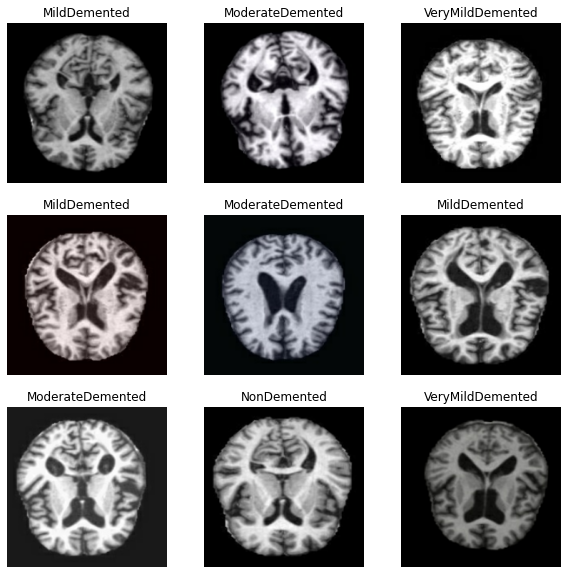

In [7]:
 plt.figure(figsize=(10, 10))
 for images, labels in train_ds.take(1):
     for i in range(9):
         ax = plt.subplot(3, 3, i + 1)
         plt.imshow(images[i].numpy().astype("uint8"))
         plt.title(train_ds.class_names[labels[i]])
         plt.axis("off")

In [32]:
model1 = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])

In [33]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 32)      

In [34]:
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [35]:
history1 = model1.fit(train_ds,
    #steps_per_epoch=num_class,
    validation_data=val_ds,
    #validation_steps=num_class,
    epochs=50)

Epoch 1/50
1062/1062 [==============================] - 347s 326ms/step - loss: 1.0981 - accuracy: 0.5639 - val_loss: 0.6014 - val_accuracy: 0.7236
Epoch 2/50
1062/1062 [==============================] - 347s 327ms/step - loss: 0.5306 - accuracy: 0.7717 - val_loss: 0.4269 - val_accuracy: 0.8209
Epoch 3/50
1062/1062 [==============================] - 341s 321ms/step - loss: 0.3498 - accuracy: 0.8559 - val_loss: 0.1611 - val_accuracy: 0.9392
Epoch 4/50
1062/1062 [==============================] - 346s 325ms/step - loss: 0.2492 - accuracy: 0.8993 - val_loss: 0.2391 - val_accuracy: 0.9203
Epoch 5/50
1062/1062 [==============================] - 342s 322ms/step - loss: 0.1921 - accuracy: 0.9247 - val_loss: 0.0749 - val_accuracy: 0.9714
Epoch 6/50
1062/1062 [==============================] - 345s 325ms/step - loss: 0.1596 - accuracy: 0.9410 - val_loss: 0.0775 - val_accuracy: 0.9717
Epoch 7/50
1062/1062 [==============================] - 344s 324ms/step - loss: 0.1364 - accuracy: 0.9482 - val_

In [46]:
history1.history['val_accuracy']

[0.7235937714576721,
 0.8209375143051147,
 0.9392187595367432,
 0.9203125238418579,
 0.9714062213897705,
 0.9717187285423279,
 0.9609375,
 0.9790624976158142,
 0.9814062714576721,
 0.9750000238418579,
 0.9775000214576721,
 0.9745312333106995,
 0.9829687476158142,
 0.9664062261581421,
 0.9670312404632568,
 0.96484375,
 0.9848437309265137,
 0.9760937690734863,
 0.9853125214576721,
 0.9878125190734863,
 0.9732812643051147,
 0.9900000095367432,
 0.9920312762260437,
 0.9834374785423279,
 0.9878125190734863,
 0.9934375286102295,
 0.9759374856948853,
 0.9834374785423279,
 0.9937499761581421,
 0.9895312786102295,
 0.9831249713897705,
 0.9865624904632568,
 0.9820312261581421,
 0.9910937547683716,
 0.9587500095367432,
 0.9607812762260437,
 0.9782812595367432,
 0.9910937547683716,
 0.9607812762260437,
 0.9856250286102295,
 0.9885937571525574,
 0.9937499761581421,
 0.9932812452316284,
 0.9840624928474426,
 0.9901562333106995,
 0.991406261920929,
 0.9926562309265137,
 0.9893749952316284,
 0.9854687

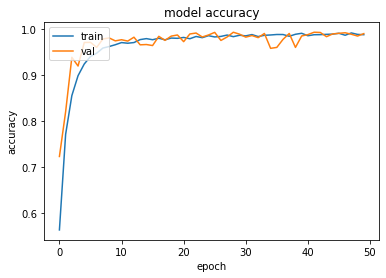

In [47]:
#Accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

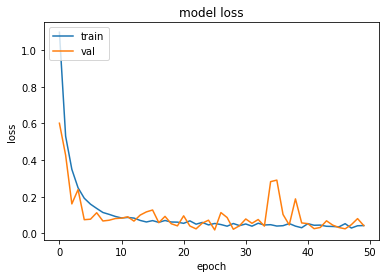

In [48]:
# loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [6]:
model2 = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    layers.Dropout(0.25),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    layers.Dropout(0.25),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])

In [50]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 32)       

In [7]:
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [53]:
history2 = model2.fit(train_ds,
    #steps_per_epoch=num_class,
    validation_data=val_ds,
    #validation_steps=num_class,
    epochs=50)

Epoch 1/50
1062/1062 [==============================] - 367s 345ms/step - loss: 1.3772 - accuracy: 0.4526 - val_loss: 0.8025 - val_accuracy: 0.6066
Epoch 2/50
1062/1062 [==============================] - 363s 342ms/step - loss: 0.7271 - accuracy: 0.6766 - val_loss: 0.5781 - val_accuracy: 0.7364
Epoch 3/50
1062/1062 [==============================] - 363s 341ms/step - loss: 0.5433 - accuracy: 0.7673 - val_loss: 0.4324 - val_accuracy: 0.8217
Epoch 4/50
1062/1062 [==============================] - 363s 341ms/step - loss: 0.4313 - accuracy: 0.8219 - val_loss: 0.2821 - val_accuracy: 0.8948
Epoch 5/50
1062/1062 [==============================] - 362s 340ms/step - loss: 0.3624 - accuracy: 0.8528 - val_loss: 0.2462 - val_accuracy: 0.9058
Epoch 6/50
1062/1062 [==============================] - 362s 341ms/step - loss: 0.3142 - accuracy: 0.8743 - val_loss: 0.1096 - val_accuracy: 0.9694
Epoch 7/50
1062/1062 [==============================] - 364s 342ms/step - loss: 0.2704 - accuracy: 0.8936 - val_

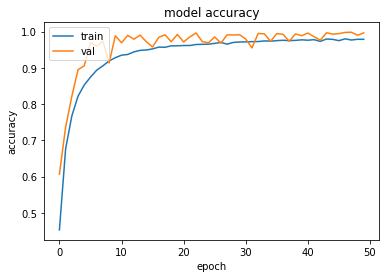

In [54]:
#Accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

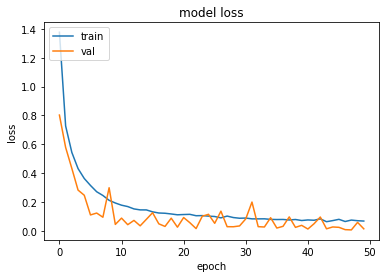

In [55]:
# loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [78]:
history = model2.fit(val_ds,
    #steps_per_epoch=num_class,
    #validation_data=val_ds,
    #validation_steps=num_class,
    epochs=50)

Epoch 1/50
200/200 [==============================] - 65s 327ms/step - loss: 0.0727 - accuracy: 0.9797
Epoch 2/50
200/200 [==============================] - 65s 326ms/step - loss: 0.0845 - accuracy: 0.9772
Epoch 3/50
200/200 [==============================] - 66s 329ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 4/50
200/200 [==============================] - 65s 327ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 5/50
200/200 [==============================] - 65s 327ms/step - loss: 0.0334 - accuracy: 0.9897
Epoch 6/50
200/200 [==============================] - 66s 327ms/step - loss: 0.0195 - accuracy: 0.9955
Epoch 7/50
200/200 [==============================] - 66s 329ms/step - loss: 0.0354 - accuracy: 0.9898
Epoch 8/50
200/200 [==============================] - 66s 327ms/step - loss: 0.0397 - accuracy: 0.9884
Epoch 9/50
200/200 [==============================] - 65s 326ms/step - loss: 0.0273 - accuracy: 0.9909
Epoch 10/50
200/200 [==============================] - 65s 323ms/step - l

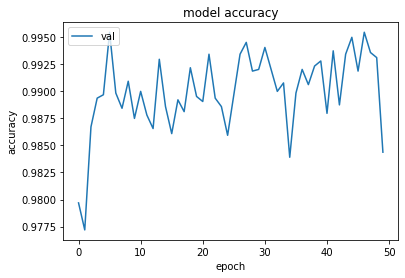

In [87]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

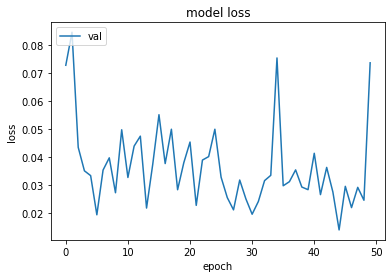

In [81]:
# loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val'], loc='upper left')
plt.show()

In [94]:
import numpy as np

In [137]:
df1 = pd.DataFrame(np.array(history1.history['val_accuracy'])).add_prefix("m1")
df2 = pd.DataFrame(np.array(history2.history['val_accuracy'])).add_prefix("m2")

In [138]:
df=pd.concat([df1,df2], sort = False, axis=1)
df

,m10,m20
0,0.723594,0.606562
1,0.820938,0.736406
2,0.939219,0.821719
3,0.920313,0.894844
4,0.971406,0.905781
5,0.971719,0.969375
6,0.960938,0.959687
7,0.979062,0.973906
8,0.981406,0.913281
9,0.975000,0.988594


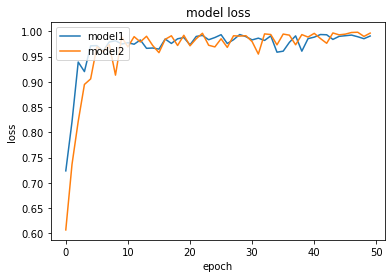

In [136]:
# loss
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model1', 'model2'], loc='upper left')
plt.show()

In [10]:
history = model2.fit(vis,
    #steps_per_epoch=num_class,
    #validation_data=val_ds,
    #validation_steps=num_class,
    epochs=50)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 25.2450 - accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 120ms/step - loss: 221.1730 - accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 122ms/step - loss: 104.5209 - accuracy: 0.1250
Epoch 4/50
1/1 [==============================] - 0s 114ms/step - loss: 92.4393 - accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 110ms/step - loss: 78.6039 - accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 109ms/step - loss: 41.2500 - accuracy: 0.2500
Epoch 7/50
1/1 [==============================] - 0s 110ms/step - loss: 9.0642 - accuracy: 0.5000
Epoch 8/50
1/1 [==============================] - 0s 107ms/step - loss: 5.8061 - accuracy: 0.5000
Epoch 9/50
1/1 [==============================] - 0s 106ms/step - loss: 7.1676 - accuracy: 0.2500
Epoch 10/50
1/1 [==============================] - 0s 107ms/step - loss: 2.7587 - accuracy: 0.6250
Epoch 11/50
1/

In [15]:
y_pred_test = model2.predict(vis)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

1/1 [==============================] - 0s 34ms/step


In [73]:
y_pred_test_labels

array([1, 2, 0, 3, 2, 3, 1, 0], dtype=int64)

In [8]:
vis = tf.keras.utils.image_dataset_from_directory(
  'C:/DS/Netology/Diploma/Data/visualisation',
  #validation_split=0.2,
  #subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8 files belonging to 4 classes.


C:\Users\chizm\AppData\Local\Temp\ipykernel_37528\1006914013.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


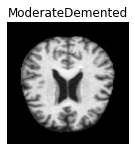

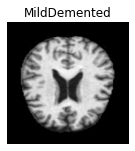

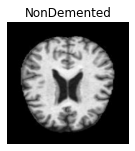

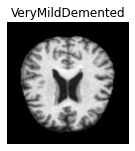

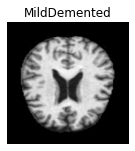

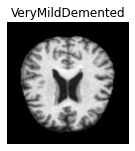

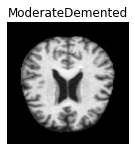

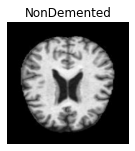

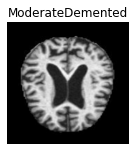

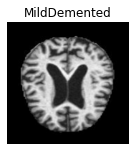

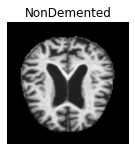

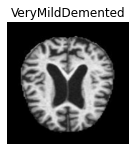

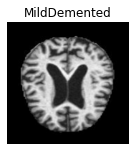

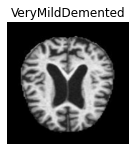

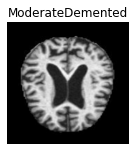

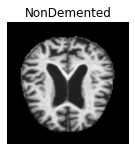

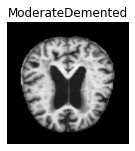

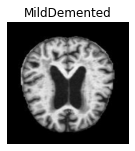

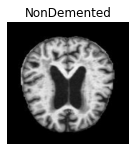

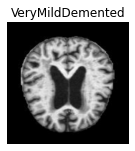

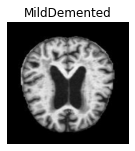

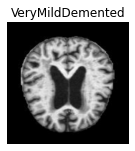

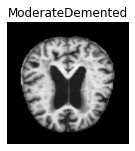

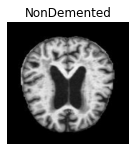

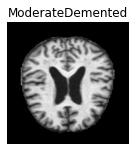

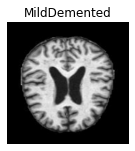

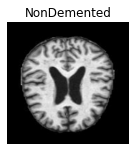

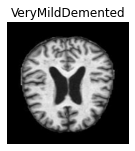

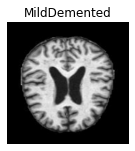

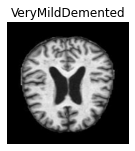

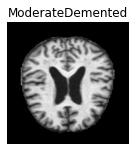

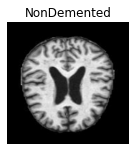

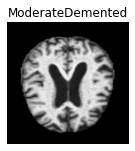

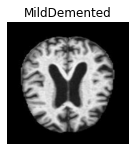

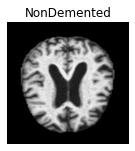

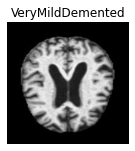

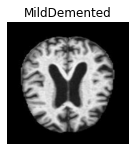

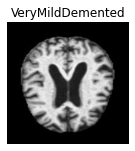

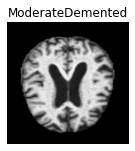

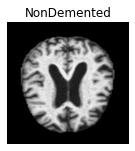

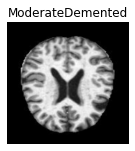

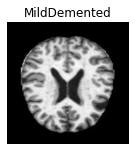

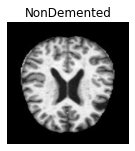

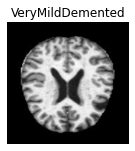

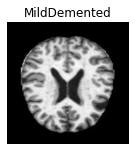

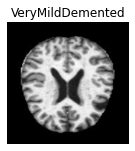

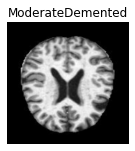

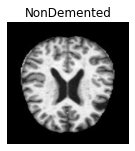

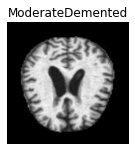

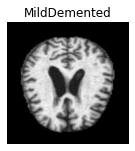

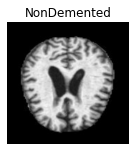

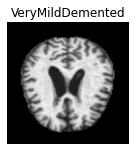

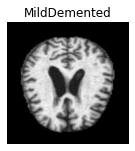

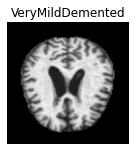

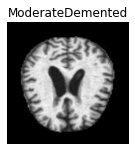

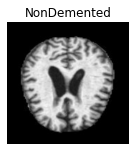

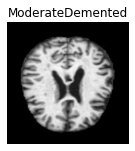

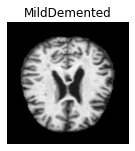

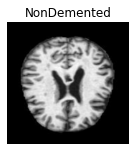

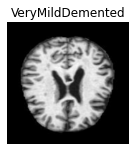

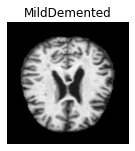

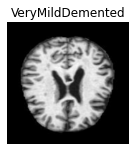

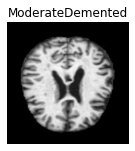

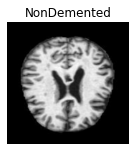

<Figure size 720x720 with 0 Axes>

In [74]:
 plt.figure(figsize=(10, 10))
 for images, labels in vis.take(1):
     for i in range(8):
         for j in y_pred_test_labels[:8]:
             ax = plt.subplot(2, 4, i + 1)
             plt.imshow(images[i].numpy().astype("uint8"))
             plt.title(vis.class_names[labels[i]])
             #plt.imshow(images[j].numpy().astype("uint8"))
             plt.title(vis.class_names[labels[j]])
             plt.axis("off")
             plt.figure(figsize=(10, 10))
